# Imports

In [1]:
# Basics
import numpy as np
import pandas as pd
import nltk
import unicodedata
import re

# Visuals
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Custom
import env
import acquire
import prepare


# Exercise 1
**Spam Data**

   - Load the spam data set.
   - Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
   - Is there any overlap in the bigrams for the spam data and the ham data?
   - Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.



In [2]:
from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")

In [3]:
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


In [6]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
# Construct word count df
all_text = ' '.join(df.text)
spam_text = ' '.join(df[df.label == 'spam'].text)
ham_text = ' '.join(df[df.label == 'ham'].text)
all_text = prepare.clean(all_text)
spam_text = prepare.clean(spam_text)
ham_text = prepare.clean(ham_text)

In [8]:
pd.Series(all_text.split()).value_counts()

u           1182
call         600
2            478
im           462
get          397
            ... 
rupaul         1
basket         1
dane           1
corrct         1
bitching       1
Length: 8888, dtype: int64

In [9]:
# Frequencies
ham_freq = pd.Series(ham_text.split()).value_counts()
spam_freq = pd.Series(spam_text.split()).value_counts()
all_freq = pd.Series(all_text.split()).value_counts()

In [10]:
# word Counts
word_counts = pd.concat([all_freq, spam_freq, ham_freq], sort=True, axis=1)
word_counts.columns = ['all', 'spam', 'ham']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))

In [16]:
pd.Series(nltk.ngrams(all_text.split(), 2)).value_counts().head(20)

(please, call)         53
(call, later)          52
(ill, call)            48
(let, know)            41
(u, r)                 40
(r, u)                 40
(sorry, ill)           39
(dont, know)           38
(new, year)            32
(wan, 2)               31
(good, morning)        31
(customer, service)    29
(take, care)           26
(u, get)               26
(contact, u)           26
(po, box)              25
(im, going)            24
(u, know)              23
(guaranteed, call)     23
(u, wan)               23
dtype: int64

<AxesSubplot:>

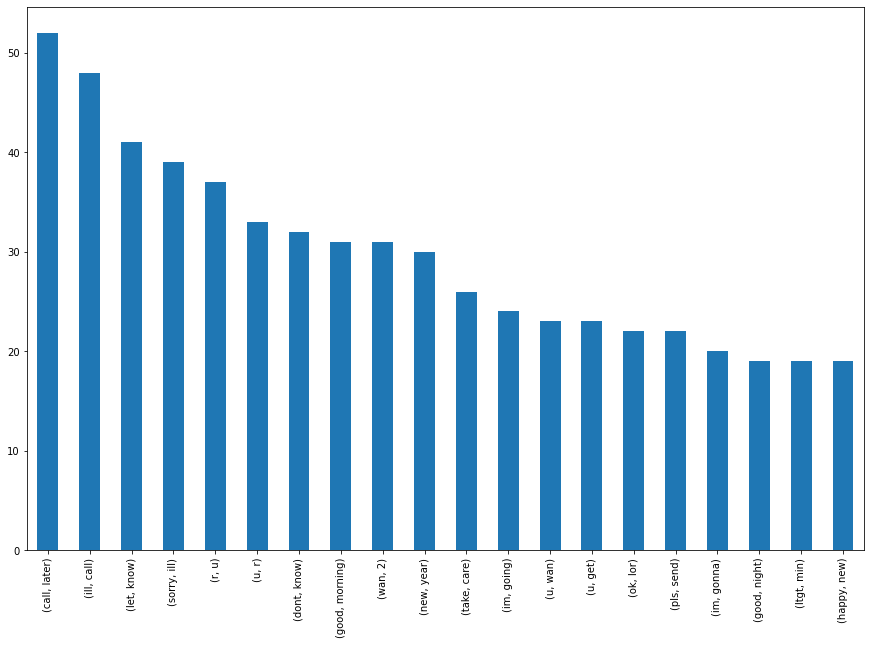

In [17]:
pd.Series(nltk.bigrams(ham_text.split())).value_counts().head(20).plot.bar(figsize=(15,10))

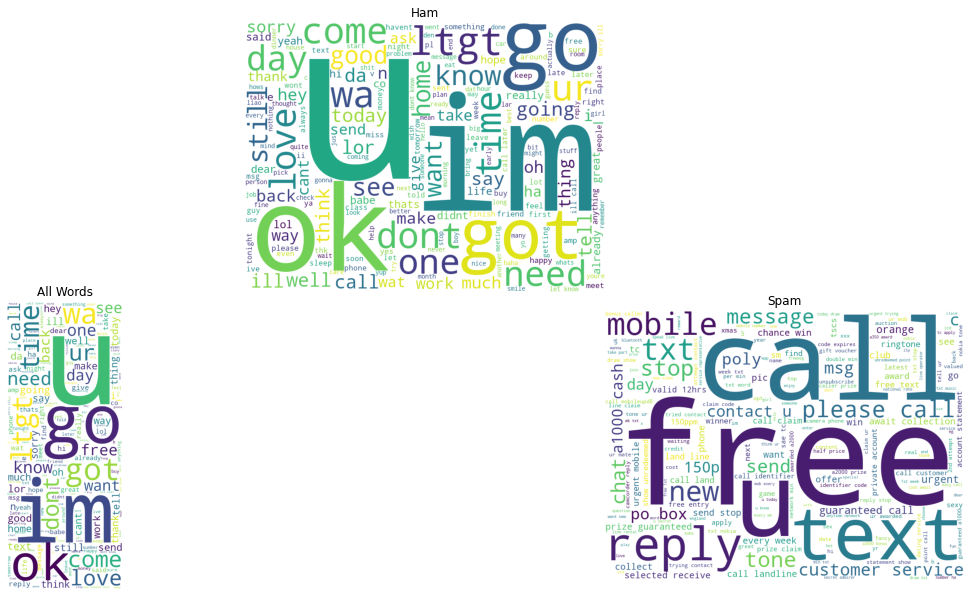

In [14]:
from wordcloud import WordCloud

all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_text)
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(ham_text)
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(spam_text)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, .5]), plt.axes([.5, .5, .5, .5]), plt.axes([1, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')

<AxesSubplot:>

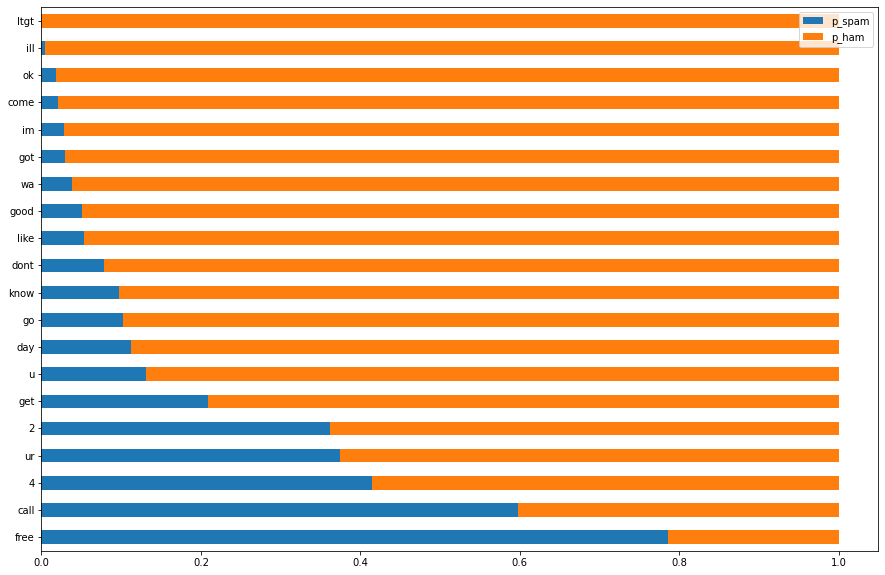

In [18]:
word_counts.assign(p_spam=word_counts.spam / word_counts['all'],p_ham=word_counts.ham / word_counts['all'])\
    .sort_values(by='all')\
    .tail(20)\
    [['p_spam', 'p_ham']]\
    .sort_values(by='p_ham')\
    .plot.barh(stacked=True, figsize=(15,10))

# Exercise 2


**Explore the blog articles using the techniques discussed in the exploration lesson.**


# Exercise 3
**Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.**